26 May, 2021

#### This notebook was branched off from all_drumming_signal_conversion.ipynb. After loading the data, I visualized the resulting drumming signal. This led to the conclusion that the signal was imporperly normalized, therefore the resulting y axis become Hz if it is multiplied by 4 (i.e. the units are beats per quarter second).

In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from os import path
from scipy.signal import windows, oaconvolve
%config Completer.use_jedi=False

In [2]:
import sys

code_path = path.abspath(path.join('..','..','diss3_code','midi'))
print(code_path, path.exists(code_path))

sys.path.append(code_path)
import midi_utils as mu

/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/midi True


In [3]:
from importlib import reload
reload(mu);

In [4]:
midi_paths = ['MIDI-Freestyle', 'MIDI-Interaction']
midi_paths = [path.abspath(path.join('..','..','..','data',p)) for p in midi_paths]
print([path.exists(p) for p in midi_paths])
midi_files = sum([glob.glob(path.join(mp,'*.mid')) for mp in midi_paths],[] )

[True, True]


In [5]:
all_ticks = mu.populate_music_dictionary(midi_files)

('1009', 'Freestyle', 43)
('1009', 'Freestyle', 45)
('1009', 'Freestyle', 48)
('1025', 'Freestyle', 43)
('1025', 'Freestyle', 48)
('1025', 'Freestyle', 45)
('1021', 'Freestyle', 45)
('1021', 'Freestyle', 48)
('1021', 'Freestyle', 43)
('1018', 'Freestyle', 43)
('1018', 'Freestyle', 48)
('1018', 'Freestyle', 45)
('1008', 'Freestyle', 48)
('1008', 'Freestyle', 45)
('1008', 'Freestyle', 43)
('1048', 'Freestyle', 45)
('1048', 'Freestyle', 43)
('1048', 'Freestyle', 48)
('1026', 'Freestyle', 43)
('1026', 'Freestyle', 45)
('1026', 'Freestyle', 48)
('1024', 'Freestyle', 43)
('1024', 'Freestyle', 48)
('1024', 'Freestyle', 45)
('1023', 'Freestyle', 48)
('1023', 'Freestyle', 43)
('1023', 'Freestyle', 45)
('1033', 'Freestyle', 45)
('1033', 'Freestyle', 43)
('1033', 'Freestyle', 48)
('1045', 'Freestyle', 48)
('1045', 'Freestyle', 43)
('1045', 'Freestyle', 45)
('1034', 'Freestyle', 45)
('1034', 'Freestyle', 48)
('1034', 'Freestyle', 43)
('1046', 'Freestyle', 48)
('1046', 'Freestyle', 45)
('1046', 'Fr

In [6]:
ticks_per_sec = {(1003, 'non-predictable'): 176,
 (1005, 'non-predictable'): 176,
 (1008, 'non-predictable'): 208,
 (1010, 'non-predictable'): 176,
 (1012, 'non-predictable'): 176,
 (1014, 'non-predictable'): 176,
 (1016, 'non-predictable'): 192,
 (1018, 'non-predictable'): 192,
 (1020, 'non-predictable'): 176,
 (1022, 'non-predictable'): 176,
 (1024, 'non-predictable'): 176,
 (1026, 'non-predictable'): 176,
 (1028, 'non-predictable'): 176,
 (1030, 'non-predictable'): 176,
 (1032, 'non-predictable'): 176,
 (1034, 'non-predictable'): 176,
 (1036, 'non-predictable'): 176,
 (1003, 'freestyle'): 96,
 (1005, 'freestyle'): 128,
 (1008, 'freestyle'): 128,
 (1010, 'freestyle'): 128,
 (1012, 'freestyle'): 128,
 (1014, 'freestyle'): 128,
 (1016, 'freestyle'): 96,
 (1018, 'freestyle'): 128,
 (1020, 'freestyle'): 128,
 (1022, 'freestyle'): 128,
 (1024, 'freestyle'): 128,
 (1026, 'freestyle'): 128,
 (1028, 'freestyle'): 128,
 (1030, 'freestyle'): 128,
 (1032, 'freestyle'): 96,
 (1034, 'freestyle'): 96,
 (1036, 'freestyle'): 96}

In [7]:
ticks_per_sec_complete = {(gr,session): ticks_per_sec.get((int(gr),'freestyle' if session == 'Freestyle' else 'non-predictable'), 96) for gr, session, _ in all_ticks.keys()}

In [8]:
ticks_per_sec_complete

{('1009', 'Freestyle'): 96,
 ('1025', 'Freestyle'): 96,
 ('1021', 'Freestyle'): 96,
 ('1018', 'Freestyle'): 128,
 ('1008', 'Freestyle'): 128,
 ('1048', 'Freestyle'): 96,
 ('1026', 'Freestyle'): 128,
 ('1024', 'Freestyle'): 128,
 ('1023', 'Freestyle'): 96,
 ('1033', 'Freestyle'): 96,
 ('1045', 'Freestyle'): 96,
 ('1034', 'Freestyle'): 96,
 ('1046', 'Freestyle'): 96,
 ('1035', 'Freestyle'): 96,
 ('1030', 'Freestyle'): 128,
 ('1031', 'Freestyle'): 96,
 ('1032', 'Freestyle'): 96,
 ('1014', 'Freestyle'): 128,
 ('1002', 'Freestyle'): 96,
 ('1016', 'Freestyle'): 96,
 ('1042', 'Freestyle'): 96,
 ('1013', 'Freestyle'): 96,
 ('1029', 'Freestyle'): 96,
 ('1047', 'Freestyle'): 96,
 ('1050', 'Freestyle'): 96,
 ('1049', 'Freestyle'): 96,
 ('1003', 'Freestyle'): 96,
 ('1004', 'Freestyle'): 96,
 ('1038', 'Freestyle'): 96,
 ('1022', 'Freestyle'): 128,
 ('1015', 'Freestyle'): 96,
 ('1007', 'Freestyle'): 96,
 ('1051', 'Freestyle'): 96,
 ('1044', 'Freestyle'): 96,
 ('1041', 'Freestyle'): 96,
 ('1019', 'Fr

In [76]:
def resample(drum_signals, ticks_per_sec, window_size_secs, window_parameter_secs):
    kernel = windows.gaussian(window_size_secs*ticks_per_sec, window_parameter_secs*ticks_per_sec)
    kernel = kernel/kernel.sum()
    y_resampled = []
    for signal in drum_signals:
        x = mu.to_dense(np.array(signal))
        y = oaconvolve(x, kernel)
        sampling_interval = int(ticks_per_sec/4) # for a 4 Hz sampling frequency
        y_resampled.append(y[::sampling_interval]*sampling_interval*4)
        
    max_vec_len = max([len(v) for v in y_resampled])
    max_vec_len = max_vec_len+ (4-(max_vec_len % 4) if (max_vec_len % 4) else 0)
    y_resampled = [np.hstack([v, [0.]*(max_vec_len-len(v))]) for v in y_resampled]
    ret = [np.vstack([np.arange(0,int(max_vec_len/4),0.25),v]) for v in y_resampled]
    
    return ret


In [13]:
all_ticks[('1007','Freestyle',43)]
ticks_per_sec_complete[('1007','Freestyle')]

96

In [23]:
len(all_ticks[('1007','Freestyle',45)])

637

(1000.0, 8000.0)

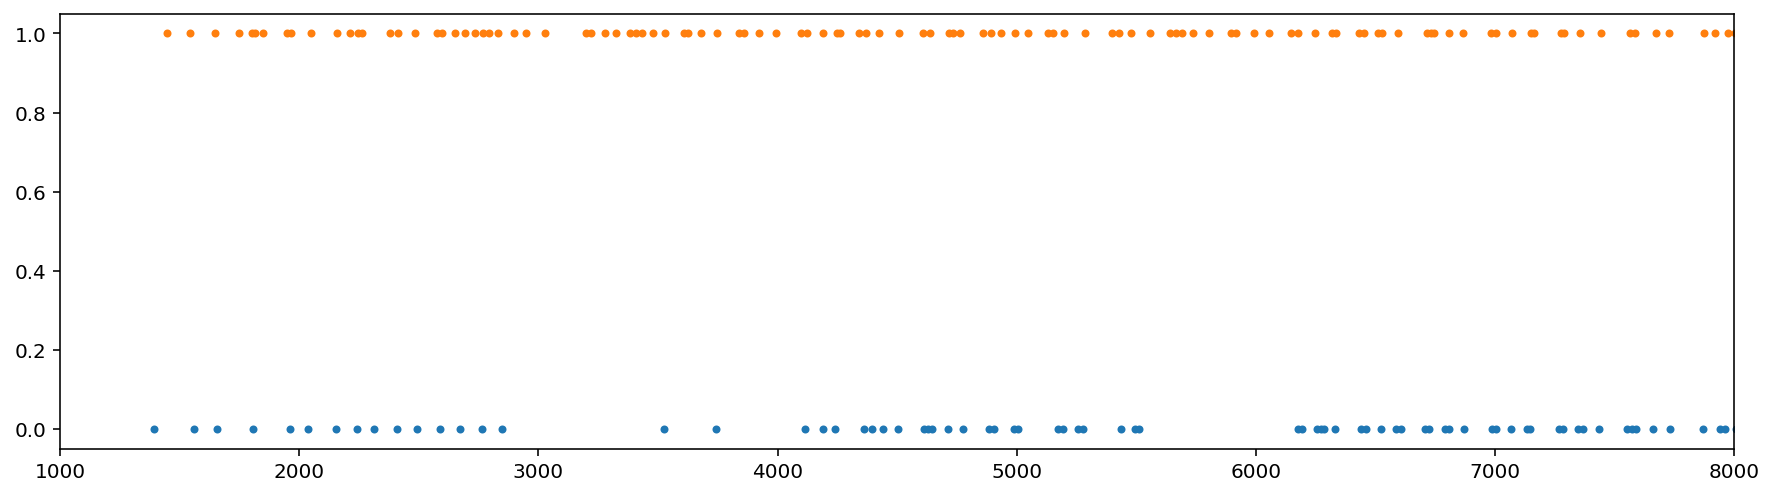

In [26]:
plt.figure(figsize=(15,4))
plt.plot(all_ticks[('1007','Freestyle',48)], np.zeros(212),'.')
plt.plot(all_ticks[('1007','Freestyle',45)], 1+np.zeros(637),'.')
plt.xlim(1000,8000)

In [30]:
rs = resample([all_ticks[('1007','Freestyle',48)],
         all_ticks[('1007','Freestyle',45)]],96,20,2)

In [31]:
rs[0]

array([[ 0.00000000e+00,  2.50000000e-01,  5.00000000e-01, ...,
         4.06250000e+02,  4.06500000e+02,  4.06750000e+02],
       [ 6.06329801e-17,  1.51582450e-17, -3.03164901e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

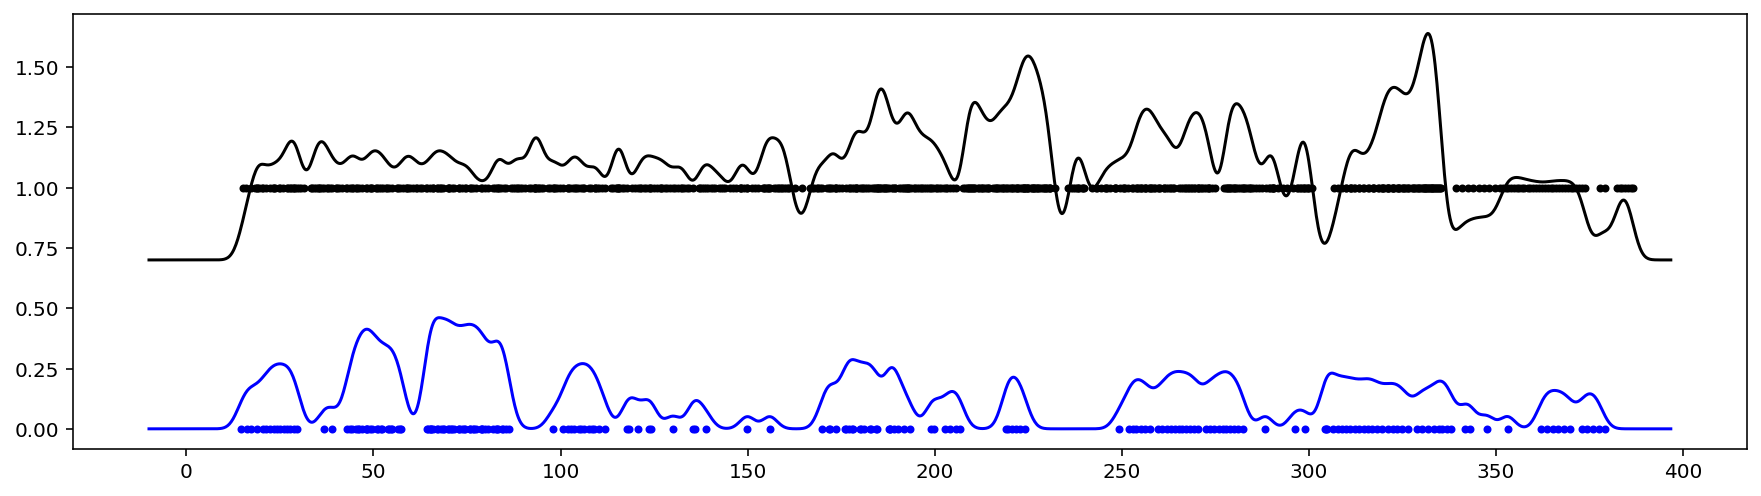

In [43]:
plt.figure(figsize=(15,4))
plt.plot(np.array(all_ticks[('1007','Freestyle',48)])/96, np.zeros(212),'b.')
plt.plot(np.array(all_ticks[('1007','Freestyle',45)])/96, 1+np.zeros(637),'k.')

plt.plot(rs[0][0,:]-10,rs[0][1,:],'b-')
plt.plot(rs[1][0,:]-10,0.7+rs[1][1,:],'k-')



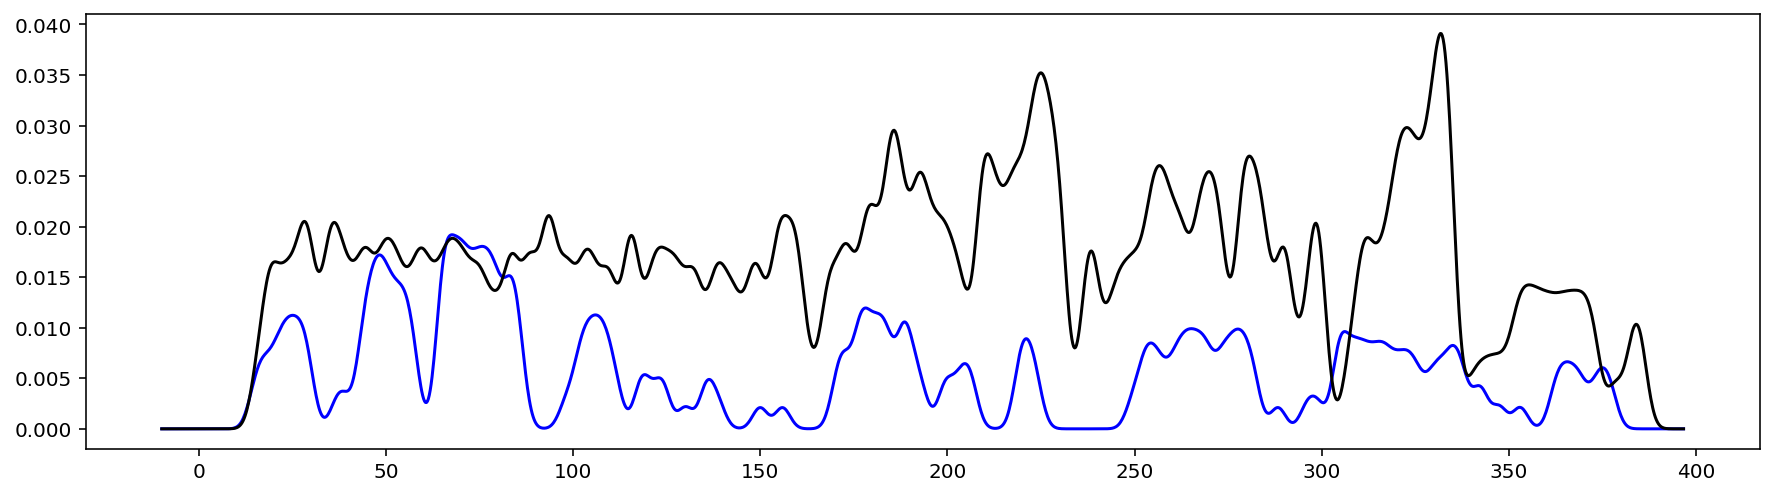

In [55]:
plt.figure(figsize=(15,4))
#plt.plot(np.array(all_ticks[('1007','Freestyle',48)])/96, np.zeros(212),'b.')
#plt.plot(np.array(all_ticks[('1007','Freestyle',45)])/96, 1+np.zeros(637),'k.')


rs = resample([all_ticks[('1007','Freestyle',48)],
         all_ticks[('1007','Freestyle',45)]],96,20,2)

plt.plot(rs[0][0,:]-10,rs[0][1,:],'b-')
plt.plot(rs[1][0,:]-10,rs[1][1,:],'k-')



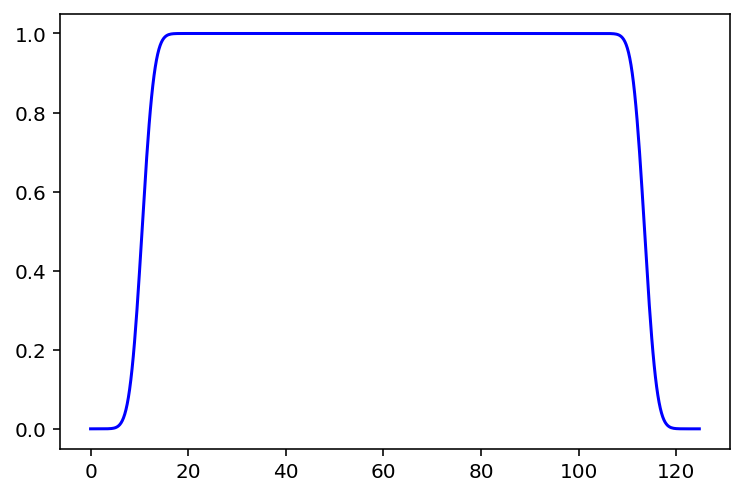

In [77]:
rsa = resample([np.arange(100,10000,96)],96,20,2)
plt.plot(rsa[0][0,:],rsa[0][1,:],'b-')


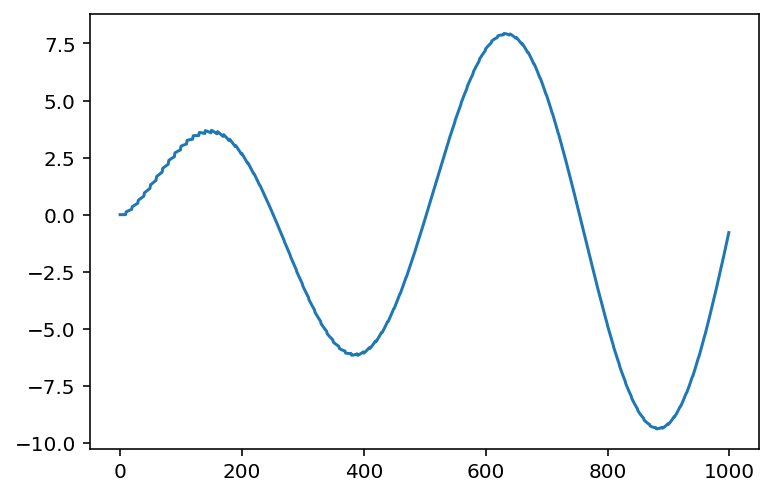

In [58]:
x = np.arange(1000)
y = np.sqrt(x//10)*np.sin(x/80)
plt.plot(x,y)

In [59]:
sum(y)

-666.1047175467897

In [64]:
 np.sum(mu.to_dense(np.array(all_ticks[('1007','Freestyle',48)])))

211.0

In [71]:
kernel = windows.gaussian(20*96, 2*96)
kernel = kernel/kernel.sum()
x = mu.to_dense(np.array(all_ticks[('1007','Freestyle',48)]))
y  = oaconvolve(x, kernel)*24
np.sum(y[::24])

211.000000217342

In [53]:
10000/96

104.16666666666667

In [11]:
next(iter(all_ticks))

('1009', 'Freestyle', 43)